In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
def shuffle_examples(X,y):
  p = np.random.permutation(len(X))
  return X[p],y[p]

def split_train_test(X,y,prop_train):
  n = int(prop_train*len(X))
  return X[:n],y[:n],X[n:],y[n:]   

def scale(x):
  mu = np.mean(x,axis=0)
  st = np.std(x,axis=0)
  return (x-mu)/st,mu,st  

def sigmoid(x):
  return 1/(1+np.exp(-x))

def predictions(X,w,b):  
  return sigmoid(np.matmul(X,w)+b)

def predictions_scaling(X,X_mean,X_std,w,b):
  return predictions((X-X_mean)/X_std,w,b)
  
def error(y,y_hat):
  return -np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))/len(y)  

def error_gradient_w(X,y,y_hat):
  return np.matmul(y_hat-y,X)/len(y)

def error_derivative_b(X,y,y_hat):
  return np.sum(y_hat-y)/len(y)      

def steepest(X,y,r,epochs):
  k = X.shape[1]
  w = 0.1*np.random.randn(k)
  b = 0
  w_list = np.empty((0,k),float)
  b_list = np.empty(0,float)
  J_list = np.empty(0,float)
  for i in range(epochs):
    w_list = np.append(w_list,[w],axis=0)
    b_list = np.append(b_list,[b],axis=0)
    y_hat = predictions(X,w,b)
    J_list = np.append(J_list,[error(y,y_hat)])  
    w = w - r*error_gradient_w(X,y,y_hat)
    b = b - r*error_derivative_b(X,y,y_hat)
  w_list = np.append(w_list,[w],axis=0)
  b_list = np.append(b_list,[b],axis=0)
  y_hat = predictions(X,w,b) 
  J_list = np.append(J_list,[error(y,y_hat)])  
  return w_list,b_list,J_list    

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data/tumors.csv')

In [4]:
df.head()

,size of tumor,Cancer
0,4.166484,0
1,4.887466,0
2,0.727608,0
3,8.280542,1
4,1.413129,0


In [6]:
X = df[['size of tumor']].values
y = df['Cancer'].values

In [9]:
X,y = shuffle_examples(X,y)

In [19]:
train_proportion = 0.8 
X_train, y_train, X_test, y_test = split_train_test(X,y,train_proportion)

In [20]:
X_train_scaled, X_train_mean, X_train_std = scale(X_train)

In [32]:
r = 1
epochs = 1000
w_list,b_list,J_list = steepest(X_train_scaled,y_train,r,epochs)

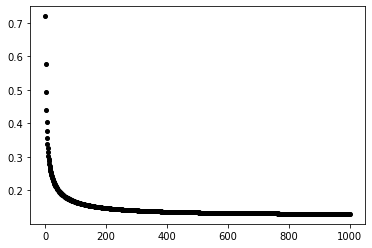

In [33]:
plt.plot(J_list,'ko',markersize = 4)

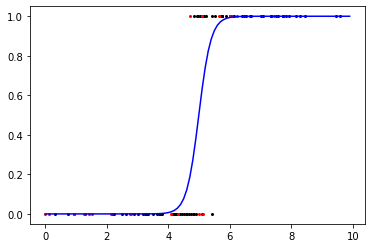

In [55]:
plt.plot(X_train.reshape(-1),y_train,'ko',markersize=2)
plt.plot(X_test.reshape(-1),y_test,'ro',markersize=2)
z = np.arange(0,10,0.1)
z = z.reshape((-1,1))
y_hat_z = predictions_scaling(z,X_train_mean,X_train_std,w_list[-1],b_list[-1])
plt.plot(z,y_hat_z,'b')


In [57]:
z = np.array([[2],[3],[5],[7]])
predictions_scaling(z,X_train_mean,X_train_std,w_list[-1],b_list[-1])

array([2.78841807e-07, 4.31514855e-05, 5.08246800e-01, 9.99959604e-01])

In [58]:
J_list[-1]

0.12956663200828528

In [59]:
w,b = w_list[-1],b_list[-1]

In [61]:
y_hat_test = predictions_scaling(X_test,X_train_mean,X_train_std,w,b)
J_test = error(y_test,y_hat_test)
print(J_test)

0.2044098853651032


In [85]:
def accuracy_recall_precision(y_hat,y):
  y_hat_cat = 1*(y_hat > 0.5)
  correct_predictions = np.sum(y_hat_cat == y)
  predictions = len(y)
  true_positives = np.sum((y_hat_cat == 1) & (y == 1))
  positives = np.sum(y)
  predicted_positives = np.sum(y_hat_cat)
  accuracy = correct_predictions/predictions
  recall = true_positives/positives
  precision = true_positives/predicted_positives
  return accuracy, recall, precision

In [88]:
accuracy_recall_precision(y_hat_test,y_test)

(0.85, 0.8571428571428571, 0.75)

In [89]:
y_hat_train = predictions_scaling(X_train,X_train_mean,X_train_std,w,b)
accuracy_recall_precision(y_hat_train,y_train)

(0.9375, 0.925, 0.9487179487179487)

In [84]:
y_train

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1])